# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

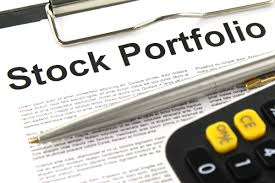

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.

1. Mostrar el DataFrame de los precios diarios (2 puntos).
2. Graficar los precios (3 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).
4. Graficar los rendimientos (3 puntos).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [4]:
names = ['^GSPC', 'MSFT', 'WBA', 'TSLA']
start_date = '2015-01-01'
end_date='2019-12-31'
closes=get_adj_closes(names,start_date)
closes.head()


Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,41.647892,43.862000,66.025406,2058.199951
2015-01-05,41.264908,42.018002,64.722275,2020.579956
2015-01-06,40.659245,42.256001,64.887360,2002.609985
2015-01-07,41.175831,42.189999,66.546669,2025.900024
2015-01-08,42.387146,42.124001,67.372002,2062.139893


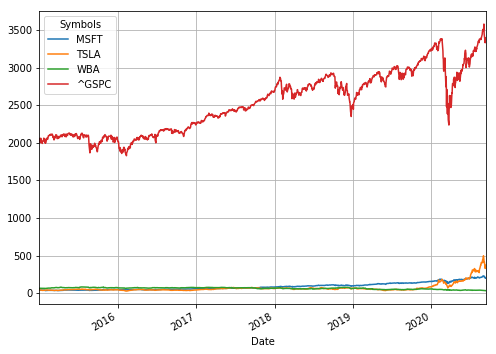

In [8]:
closes.plot(figsize=(8,6),grid=True);

In [9]:
closes.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,41.647892,43.862000,66.025406,2058.199951
2015-01-05,41.264908,42.018002,64.722275,2020.579956
2015-01-06,40.659245,42.256001,64.887360,2002.609985
2015-01-07,41.175831,42.189999,66.546669,2025.900024
2015-01-08,42.387146,42.124001,67.372002,2062.139893


In [10]:
closes.shift().head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,41.647892,43.862000,66.025406,2058.199951
2015-01-06,41.264908,42.018002,64.722275,2020.579956
2015-01-07,40.659245,42.256001,64.887360,2002.609985
2015-01-08,41.175831,42.189999,66.546669,2025.900024


In [11]:
ret = ((closes - closes.shift()) / closes.shift()).dropna()
ret.head()

Symbols,MSFT,TSLA,WBA,^GSPC
Date,,,,
2015-01-05,-0.009196,-0.042041,-0.019737,-0.018278
2015-01-06,-0.014677,0.005664,0.002551,-0.008893
2015-01-07,0.012705,-0.001562,0.025572,0.011630
2015-01-08,0.029418,-0.001564,0.012402,0.017888
2015-01-09,-0.008405,-0.018802,-0.024243,-0.008404


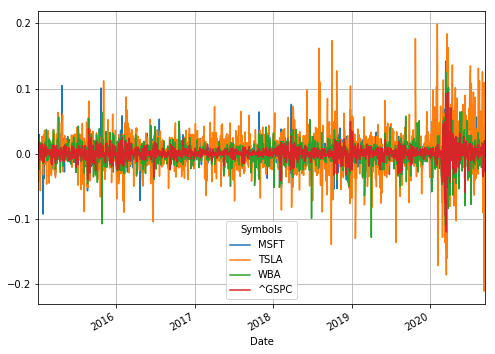

In [13]:
ret.plot(figsize=(8,6),grid=True);

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [14]:
ret_summary = pd.DataFrame({'Rend medio': ret.mean(), 'Volatilidad': ret.std()})
ret_summary

,Rend medio,Volatilidad
Symbols,,
MSFT,0.001264,0.017580
TSLA,0.002084,0.034378
WBA,-0.000279,0.018343
^GSPC,0.000408,0.011819


In [15]:
ret_summary_a = pd.DataFrame({"Rend anual":252*ret.mean(),"Vol anual":np.sqrt(252)*ret.std()})
ret_summary_a

,Rend anual,Vol anual
Symbols,,
MSFT,0.318475,0.279073
TSLA,0.525107,0.545738
WBA,-0.070426,0.291188
^GSPC,0.102907,0.187623


## 3. Rentimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).
2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>